#  Wafer fault Prediction

**Brief:** In electronics, a **wafer** (also called a slice or substrate) is a thin slice of semiconductor, such as a crystalline silicon (c-Si), used for the fabrication of integrated circuits and, in photovoltaics, to manufacture solar cells. The wafer serves as the substrate(serves as foundation for contruction of other components) for microelectronic devices built in and upon the wafer. 

It undergoes many microfabrication processes, such as doping, ion implantation, etching, thin-film deposition of various materials, and photolithographic patterning. Finally, the individual microcircuits are separated by wafer dicing and packaged as an integrated circuit.

#### Problem Statement

**Data:** Wafers data

**Problem Statement:** Wafers are predominantly used to manufacture solar cells and are located at remote locations in bulk and they themselves consist of few hundreds of sensors. Wafers are fundamental of photovoltaic power generation, and production thereof requires high technology. Photovoltaic power generation system converts sunlight energy directly to electrical energy.

The motto behind figuring out the faulty wafers is to obliterate the need of having manual man-power doing the same. And make no mistake when we're saying this, even when they suspect a certain wafer to be faulty, they had to open the wafer from the scratch and deal with the issue, and by doing so all the wafers in the vicinity had to be stopped disrupting the whole process and stuff anf this is when that certain wafer was indeed faulty, however, when their suspicion came outta be false negative, then we can only imagine the waste of time, man-power and ofcourse, cost incurred.

**Solution:** Data fetched by wafers is to be passed through the machine learning pipeline and it is to be determined whether the wafer at hand is faulty or not apparently obliterating the need and thus cost of hiring manual labour.

### Importing Datasets and it's Analysis

In [1]:
import pandas as pd
# Loading the datasets as dataframe
df = pd.read_csv('wafer.csv')
print('Shape of the dataset',df.shape)
df.head()

Shape of the dataset (100, 592)


,Unnamed: 0,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,Wafer-801,2968.33,2476.58,2216.7333,1748.0885,1.1127,100.0,97.5822,0.1242,1.5300,...,NaN,0.5004,0.0120,0.0033,2.4069,0.0545,0.0184,0.0055,33.7876,-1
1,Wafer-802,2961.04,2506.43,2170.0666,1364.5157,1.5447,100.0,96.7700,0.1230,1.3953,...,NaN,0.4994,0.0115,0.0031,2.3020,0.0545,0.0184,0.0055,33.7876,1
2,Wafer-803,3072.03,2500.68,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.3896,...,NaN,0.4987,0.0118,0.0036,2.3719,0.0545,0.0184,0.0055,33.7876,-1
3,Wafer-804,3021.83,2419.83,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.4108,...,NaN,0.4934,0.0123,0.0040,2.4923,0.0545,0.0184,0.0055,33.7876,-1
4,Wafer-805,3006.95,2435.34,2189.8111,1084.6502,1.1993,100.0,104.8856,0.1234,1.5094,...,NaN,0.4987,0.0145,0.0041,2.8991,0.0545,0.0184,0.0055,33.7876,-1


In [2]:
# Renaming the columns and anaylising
df.rename(columns={'Unnamed: 0': 'Wafer Name'}, inplace=True)
print(df['Good/Bad'].value_counts())
print(df['Good/Bad'].isna().sum())
print(df.info())
df.describe()

Good/Bad
-1    94
 1     6
Name: count, dtype: int64
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 592 entries, Wafer Name to Good/Bad
dtypes: float64(494), int64(97), object(1)
memory usage: 462.6+ KB
None


,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
count,99.000000,100.000000,97.000000,97.000000,97.000000,97.0,97.000000,97.000000,100.000000,100.000000,...,34.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,3017.301212,2487.180300,2202.168281,1484.362181,1.180367,100.0,97.449088,0.122195,1.461516,0.000243,...,74.331709,0.499390,0.013615,0.003549,2.727297,0.023510,0.014875,0.004685,77.430241,-0.880000
std,71.819707,66.954212,30.350606,460.985871,0.349654,0.0,5.553324,0.002006,0.071300,0.010610,...,41.857728,0.003431,0.004344,0.000873,0.875848,0.011991,0.007557,0.002527,55.106166,0.477367
min,2825.670000,2254.990000,2114.666700,978.783200,0.753100,100.0,83.423300,0.116000,1.317900,-0.027900,...,20.309100,0.492500,0.007600,0.002100,1.515200,0.009900,0.004800,0.001700,20.309100,-1.000000
25%,2973.040000,2446.595000,2189.966700,1111.543600,0.837300,100.0,95.108900,0.120800,1.407375,-0.006925,...,47.356000,0.497300,0.011300,0.003075,2.270425,0.013400,0.009475,0.002700,33.787600,-1.000000
50%,3004.390000,2493.890000,2200.988900,1244.289900,1.156900,100.0,99.513300,0.122200,1.453700,0.001000,...,65.127550,0.499400,0.012750,0.003400,2.546400,0.021800,0.013900,0.003850,62.059500,-1.000000
75%,3070.385000,2527.525000,2213.211100,1963.801600,1.383000,100.0,101.457800,0.123400,1.507425,0.008125,...,99.419050,0.501525,0.014700,0.003825,2.953750,0.028025,0.019200,0.005900,104.303400,-1.000000
max,3221.210000,2664.520000,2315.266700,2363.641200,2.207300,100.0,107.152200,0.126200,1.641100,0.025000,...,223.101800,0.508700,0.043700,0.008900,8.816000,0.054500,0.040100,0.015000,223.101800,1.000000


As we can see the dataset is highly imbalance

In [3]:
# Checking missing in rest of the datasets
print('Total Missing Values',df.isna().sum().sum())
df.isna().sum()

Total Missing Values 2306


Wafer Name    0
Sensor-1      1
Sensor-2      0
Sensor-3      3
Sensor-4      3
             ..
Sensor-587    0
Sensor-588    0
Sensor-589    0
Sensor-590    0
Good/Bad      0
Length: 592, dtype: int64

So no missing values in first (wafers name) and last (Good/Bad) columns. We will deal with missing values in preprocessing.

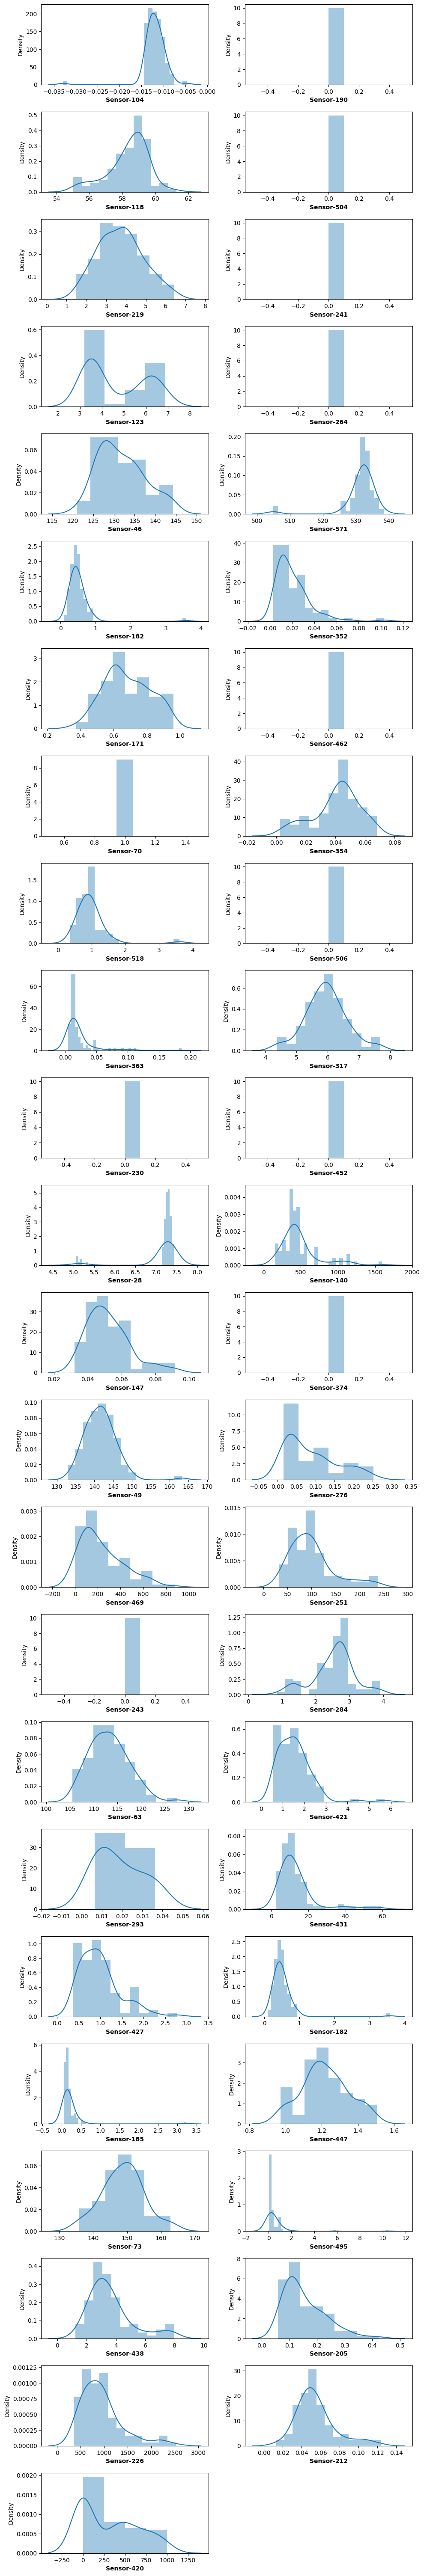

In [4]:
import matplotlib.pyplot as pt
import seaborn as sb
import numpy as ny
import warnings
warnings.filterwarnings('ignore')
# Let us visualize the distribution of random 50 sensor
rand_col = []
for i in range(50):
    if i not in rand_col:
        rand_col.append(ny.random.randint(1,590))

pt.figure(figsize=(10,100))
for i, c in enumerate(df.columns[rand_col]):
    pt.subplot(40,2,i+1)
    sb.distplot(x=df[c])
    pt.xlabel(c, weight='bold')
    pt.tight_layout()

### Data PreProcessing

In [5]:
# Now, we will drop columns with zero standard deviation

# Will give cols with 0 std dev
def get_cols(df: pd.DataFrame): 
    cols_drop = []
    cols = [c for c in df.columns if df[c].dtype != 'O']
    for c in cols:
        if df[c].std()==0:
            cols_drop.append(c)
    return cols_drop

# Will return cols having missing values more than certain thresh.
def get_cols_redundant(df: pd.DataFrame, thresh=.7):
    cols = df.isna().sum().div(df.shape[0])
    cols_drop = list(cols[cols>thresh].index)
    return cols_drop

cols_drop1 = get_cols(df=df)
cols_drop2 = get_cols_redundant(df=df, thresh=0.7)
cols_drop3 = ["Wafer Name"]
cols_drop = cols_drop1 + cols_drop2 + cols_drop3
print('No. of Columns that are been droped',len(cols_drop))

No. of Columns that are been droped 127


In [6]:
# Separating features and labels
X, y = df.drop(cols_drop, axis=1), df[['Good/Bad']]
print("Shape of the features are: ", X.shape)
print("Shape of the labels are: ", y.shape)
X.head()

Shape of the features are:  (100, 465)
Shape of the labels are:  (100, 1)


,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-7,Sensor-8,Sensor-9,Sensor-10,Sensor-11,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,2968.33,2476.58,2216.7333,1748.0885,1.1127,97.5822,0.1242,1.5300,-0.0279,-0.0040,...,NaN,0.5004,0.0120,0.0033,2.4069,0.0545,0.0184,0.0055,33.7876,-1
1,2961.04,2506.43,2170.0666,1364.5157,1.5447,96.7700,0.1230,1.3953,0.0084,0.0062,...,NaN,0.4994,0.0115,0.0031,2.3020,0.0545,0.0184,0.0055,33.7876,1
2,3072.03,2500.68,2205.7445,1363.1048,1.0518,101.8644,0.1220,1.3896,0.0138,0.0000,...,NaN,0.4987,0.0118,0.0036,2.3719,0.0545,0.0184,0.0055,33.7876,-1
3,3021.83,2419.83,2205.7445,1363.1048,1.0518,101.8644,0.1220,1.4108,-0.0046,-0.0024,...,NaN,0.4934,0.0123,0.0040,2.4923,0.0545,0.0184,0.0055,33.7876,-1
4,3006.95,2435.34,2189.8111,1084.6502,1.1993,104.8856,0.1234,1.5094,-0.0046,0.0121,...,NaN,0.4987,0.0145,0.0041,2.8991,0.0545,0.0184,0.0055,33.7876,-1


### Data Pipeline

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler # uses median to scale, while StandardScaler use mean 
from sklearn.impute import KNNImputer, SimpleImputer

imputer = KNNImputer(n_neighbors=3)
pipe = Pipeline(steps=[('Imputer',imputer),('Scaler',RobustScaler())])

x = pipe.fit_transform(X)
print('Shape of transformed features are', X.shape)

Shape of transformed features are (100, 465)


### Clustering the data

In [8]:
from typing import Tuple
from kneed import KneeLocator
from dataclasses import dataclass
from sklearn.cluster import KMeans

@dataclass
class ClusterInstance:
    x:ny.array
    desc:str
    def num_cluster(self):
        try:
            print("computing WCSS for number of clusters")
            wcss = []
            for i in range(1, 11):
                kmeans = KMeans(n_clusters=i, init='k-means++',random_state=42)
                kmeans.fit(self.x)
                wcss.append(kmeans.inertia_)
                print(f"WCSS for n_clusters={i}: {kmeans.inertia_}")
            print("Finding the ideal number of clusters via Elbow method")
            knee_finder = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')
            print(f"Ideal number of clusters to be formed: {knee_finder.knee}")

            return knee_finder.knee
        except Exception as e:
            print(e)
            raise e

    def create_cluster(self)-> Tuple:
        try:
            ideal_clusters = self.num_cluster()
            print(f"Dividing the \"{self.desc}\" instances into {ideal_clusters} clusters via KMeans Clustering.")
            kmeans = KMeans(n_clusters=ideal_clusters,
                            init='k-means++', random_state=42)
            y_kmeans = kmeans.fit_predict(self.x)
            
            return kmeans, ny.c_[self.x, y_kmeans]

        except Exception as e:
            print(e)
            raise e

# Cluster `Wafer` instances
cluster_wafers = ClusterInstance(x=x, desc="wafers features")
clusterer, x_clus = cluster_wafers.create_cluster()
print(ny.unique(x_clus[:,-1]))
x_clus

computing WCSS for number of clusters
WCSS for n_clusters=1: 1503049.6472606931
WCSS for n_clusters=2: 512194.0849012661
WCSS for n_clusters=3: 185195.115933283
WCSS for n_clusters=4: 150684.64694542703
WCSS for n_clusters=5: 108688.31540145789
WCSS for n_clusters=6: 88439.04360341988
WCSS for n_clusters=7: 75971.03430074442
WCSS for n_clusters=8: 68533.65989844222
WCSS for n_clusters=9: 65192.351415989775
WCSS for n_clusters=10: 57031.85827406697
Finding the ideal number of clusters via Elbow method
Ideal number of clusters to be formed: 3
Dividing the "wafers features" instances into 3 clusters via KMeans Clustering.
[0. 1. 2.]


array([[-0.37110152, -0.21388855,  0.67805794, ..., -0.40093   ,
         0.        ,  0.        ],
       [-0.44644841,  0.15494872, -1.32959552, ..., -0.40093   ,
         2.        ,  0.        ],
       [ 0.70070541,  0.08389967,  0.20530751, ..., -0.40093   ,
         0.        ,  0.        ],
       ...,
       [ 0.83289837, -1.31558137, -1.26792905, ..., -0.44021198,
         0.        ,  0.        ],
       [-0.49988372,  0.59310515, -0.16308229, ..., -0.44021198,
         0.        ,  0.        ],
       [-0.92374874, -0.35561596,  0.40033513, ..., -0.44021198,
         2.        ,  0.        ]])

In [9]:
# Let us see the shapes of our clusters
print(x_clus[x_clus[:,-2]==0].shape)
print(x_clus[x_clus[:,-2]==1].shape)
print(x_clus[x_clus[:,-2]==3].shape)

(94, 466)
(0, 466)
(0, 466)


here we can easily see that there is no point in making clusters

### Resampling of Training data as our dataset is imbalance

In [10]:
from imblearn.combine import SMOTETomek

resampler = SMOTETomek(sampling_strategy='auto')
x_res, y_res = resampler.fit_resample(x,y)
print("Before resampling, Shape of training instances: ", x.shape)
print("After resampling, Shape of training instances: ", x_res.shape)

## Target Cats after Resampling
print("Unique values in y_res:",ny.unique(y_res))
for v in ny.unique(y_res):
    count = len(y_res[y_res == v])
    print(f"{v}: {count}")

Before resampling, Shape of training instances:  (100, 465)
After resampling, Shape of training instances:  (188, 465)
Unique values in y_res: [-1  1]
-1: 188
1: 188


### Preparing Train and set datasets

In [11]:
from sklearn.model_selection import train_test_split

x_train, X_test, y_train, Y_test = train_test_split(x_res, y_res, test_size=0.35, random_state=47)
print(f"train set: {x_train.shape, y_train.shape}")
print(f"test set: {X_test.shape, Y_test.shape}")

# Transform the Test features
x_test = pipe.transform(X_test)
print(x_test.shape, Y_test.shape)

# Cluster the test features
y_test = clusterer.predict(x_test)

# Configure the test array
test_arr = ny.c_[x_test, Y_test, y_test]
ny.unique(y_test)

train set: ((122, 465), (122, 1))
test set: ((66, 465), (66, 1))
(66, 465) (66, 1)


array([0, 2])

In [12]:
# Prepare the test features and test labels for cluster one

X_test_prep, y_test_prep = test_arr[:, :-2], test_arr[:, -1]
print(X_test_prep.shape)

(66, 465)


In [13]:
# Prepared training and test sets

X_prep = x_train
y_prep = y_train
X_test_prep = X_test
y_test_prep = y_test
y_train = (y_train + 1) // 2

print(X_prep.shape, y_prep.shape)
print(X_test_prep.shape, y_test_prep.shape)

(122, 465) (122, 1)
(66, 465) (66,)


### Model Training

In [14]:
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score, cross_val_predict

# A list to store scores for each model
model_scores_list = []

# A function to display Scores and return them as a dictionary
def display_scores(scores, roc_auc=None):
    score_dict = {"Scores": scores, "Mean": scores.mean(), "Standard Deviation": scores.std()}
    if roc_auc is not None:
        score_dict["ROC AUC"] = roc_auc
    return score_dict

# Models and their names
models = {
    'LR': LogisticRegression(),
    'Random Forest': RandomForestClassifier(random_state=47),
    'SVM_lin': SVC(kernel='linear'),
    'SVM_rbf': SVC(kernel='rbf'),
    'Gradient Boosting': GradientBoostingClassifier(),
    'xgb': XGBClassifier(objective='binary:logistic'),
    'lgb': LGBMClassifier(objective='binary', metric='binary_logloss'),
    'catb': CatBoostClassifier(),
    'dt': DecisionTreeClassifier(),
    'knn': KNeighborsClassifier(n_neighbors=5)}

# Iterate through models and calculate scores
for model_name, model in models.items():
    model_scores = cross_val_score(model, x_train, y_train, scoring='roc_auc', cv=10, verbose=2)
    roc_auc = roc_auc_score(y_train, cross_val_predict(model, x_train, y_train, cv=10))
    print(f"Scores for {model_name}:")
    scores_dict = display_scores(model_scores, roc_auc)
    
    # Append scores to the list
    model_scores_list.append((model_name, scores_dict))

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
Scores for LR:
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END ....

In [15]:
# Create a DataFrame from the list of scores
result_df = pd.DataFrame(model_scores_list, columns=['Model', 'Scores'])
result_df['Mean'] = result_df['Scores'].apply(lambda x: x['Mean'])
result_df['Standard Deviation'] = result_df['Scores'].apply(lambda x: x['Standard Deviation'])
result_df['ROC AUC'] = result_df['Scores'].apply(lambda x: x.get('ROC AUC', None))
result_df.drop(columns=['Scores'], inplace=True)
result_df.head(15)

,Model,Mean,Standard Deviation,ROC AUC
0,LR,1.000000,0.000000e+00,1.000000
1,Random Forest,1.000000,0.000000e+00,0.983607
2,SVM_lin,1.000000,0.000000e+00,1.000000
3,SVM_rbf,0.985714,4.285714e-02,0.942623
4,Gradient Boosting,1.000000,0.000000e+00,1.000000
5,xgb,1.000000,0.000000e+00,1.000000
6,lgb,1.000000,3.510833e-17,1.000000
7,catb,1.000000,0.000000e+00,1.000000
8,dt,1.000000,0.000000e+00,1.000000
9,knn,0.959524,7.361726e-02,0.737705
